In [18]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [40]:
def prod(els: list[float]):
    p = 1
    for x in els:
        p *= x
    return p

### Major's formulas

In [51]:
# Absorption time for Moran on complete graphs
def pMp(j:int, N:int, r:float):
    # son can kill father
    return r*j / (r*j + (N-j)) * (N-j) / (N-1)

def tauM(i:int, N:int):
    def time(r: float):
        val = r**(N-i) * (r**i-1) / (r**N-1)
        val *= sum( 
            (pMp(j,N,r) * r**(N-j-1))**-1 * (r**(N-j)-1) / (r-1) 
            for j in range(1,N)
        )
        val -= sum(
            (pMp(j,N,r) * r**(i-j-1))**-1 * (r**(i-j)-1)/(r-1)
            for j in range(1,i)
        )
        return val
    
    return time
    
    

In [52]:
# Absorption time for Bernoulli proliferation on complete graphs
def tau(i:int, N:int):
    def time(r:float, p:float):
        val = sum(
            (1 + r * p - j/(N-1))**-1 * \
            (r*(j+1) + N - j -1) / (j+1) \
            * prod( 
                (1-k/(N-1)) / (1 + r*p - k / (N-1))
                for k in range(j+1,i)
            )
            for j in range(i)
        )
        return val
    return time

    

In [53]:
fM = tauM(1, 3)
fB = tau(1, 3)

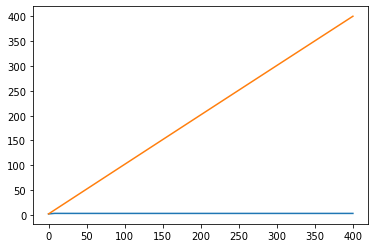

In [57]:
x = np.linspace(0.00000001, 400)
plt.plot(x , [fM(v) for v in x])
plt.plot(x , [fB(v,.00001) for v in x])

In [59]:
x,p = sp.var("x,p")

In [60]:
fB(x,p)

(x + 2)/(p*x + 1)

In [63]:
fB(x,0.00001)

(x + 2)/(1.0e-5*x + 1)